# ***Multiclass classification ***

# Loading Library

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Loading the dataset

In [3]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "sudhanshupendor" # username from the json file
os.environ['KAGGLE_KEY'] = "c005ac7afc7226faf9f71fb4fb28debf" # key from the json file

!kaggle datasets download -d misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
vegetable-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [18]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_example_images(plt, data_path="/content/Vegetable_Images/train"):
    img_size = 48
    plt.figure(0, figsize=(12, 20))
    ctr = 0

    for expression in os.listdir(data_path):
        expression_path = os.path.join(data_path, expression)
        image_files = os.listdir(expression_path)
        for i in range(1, 6):  # Adjusted to skip index errors
            if i < len(image_files):  # Check to avoid index out of range
                ctr += 1
                plt.subplot(7, 5, ctr)
                img_path = os.path.join(expression_path, image_files[i])
                img = load_img(img_path, target_size=(img_size, img_size))
                plt.imshow(img, cmap="gray")
                plt.title(expression)
                plt.axis("off")

    plt.tight_layout()
    return plt


ValueError: num must be an integer with 1 <= num <= 35, not 36

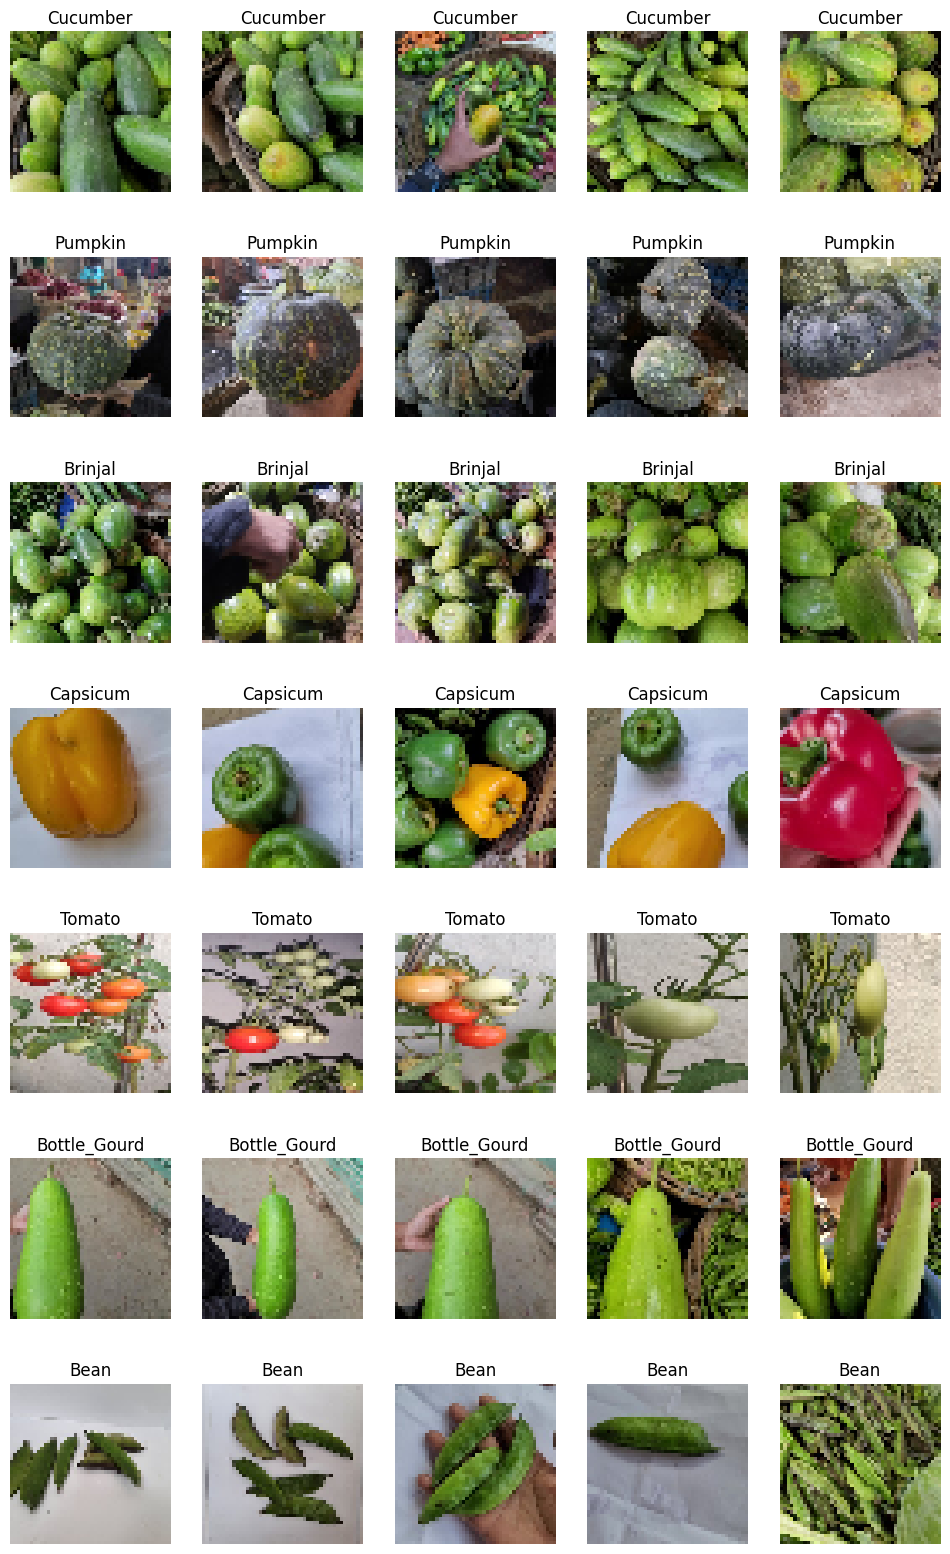

In [19]:
import matplotlib.pyplot as plt
plot_example_images(plt)
plt.show()


In [20]:
for expression in os.listdir("/content/Vegetable_Images/train"):
    path = "/content/Vegetable_Images/train/" + expression
    print(str(len(os.listdir(path))) + " " + expression + " images.")


1000 Cucumber images.
1000 Pumpkin images.
1000 Brinjal images.
1000 Capsicum images.
1000 Tomato images.
1000 Bottle_Gourd images.
1000 Bean images.
1000 Papaya images.
1000 Radish images.
1000 Bitter_Gourd images.
1000 Broccoli images.
1000 Cauliflower images.
1000 Cabbage images.
1000 Carrot images.
1000 Potato images.


In [21]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/Vegetable_Images/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("/content/Vegetable_Images/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 15000 images belonging to 15 classes.
Found 15000 images belonging to 15 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Final output layer (update from 7 to 15)
model.add(Dense(15, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,659,919 (21.59 MB)

 Trainable params: 5,656,975 (21.58 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [25]:
epochs = 20
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5",monitor='val_accuracy', # Changed filename here
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3744 - loss: 1.9798
Epoch 1: saving model to model_weights.weights.h5
234/234 ━━━━━━━━━━━━━━━━━━━━ 48s 153ms/step - accuracy: 0.3749 - loss: 1.9781 - val_accuracy: 0.5484 - val_loss: 1.3466 - learning_rate: 5.0000e-04
Epoch 2/20
  1/234 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6562 - loss: 1.2541

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
234/234 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.6562 - loss: 1.2541 - val_accuracy: 0.5001 - val_loss: 1.5422 - learning_rate: 5.0000e-04
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6904 - loss: 0.9487
Epoch 3: saving model to model_weights.weights.h5
234/234 ━━━━━━━━━━━━━━━━━━━━ 52s 118ms/step - accuracy: 0.6906 - loss: 0.9484 - val_accuracy: 0.6820 - val_loss: 0.9572 - learning_rate: 5.0000e-04
Epoch 4/20
  1/234 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7344 - loss: 0.8032
Epoch 4: saving model to model_weights.weights.h5
234/234 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.7344 - loss: 0.8032 - val_accuracy: 0.7129 - val_loss: 0.8552 - learning_rate: 5.0000e-04
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7875 - loss: 0.6721
Epoch 5: saving model to model_weights.weights.h5
234/234 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.7876 - loss: 0.6719 - val_accuracy: 0.

In [26]:
scores = model.evaluate(validation_generator)
print("Test accuracy:", scores[1])

235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9339 - loss: 0.2285
Test accuracy: 0.9287333488464355
